In [1]:
require(reshape2)
require(ggplot2)

Loading required package: reshape2
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
setwd("~/Documents/Miami_WBD/")

In [3]:
c=read.csv("normalized_otu.csv", h=T, row.names=1)

In [4]:
sig=read.csv("Miami_sigotusall.csv", h=T)

In [5]:
nrow(sig)

[1] 121

In [6]:
t= read.csv("rep_set_tax_assignments_silva_clean2.csv", header=FALSE)

In [7]:
colnames(t)=c("OTUID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "evalue", "ref")

In [8]:
sig$tax=NULL
sig$X.1=NULL
sig$X=NULL
sig$evalue=NULL

In [9]:
sigtax=merge(sig,t, by.x='Row.names', by.y='OTUID')
sigtax$ref.x=NULL
sigtax$evalue=NULL
sigtax$stat=NULL

In [10]:
rownames(sigtax)=sigtax$Row.names

In [11]:
sigtaxcounts=merge(sigtax, c, by="row.names")

Warning message in merge.data.frame(sigtax, c, by = "row.names"):
“column name ‘Row.names’ is duplicated in the result”

In [12]:
sigtaxcounts=sigtaxcounts[order(sigtaxcounts$class, sigtaxcounts$order),]

In [13]:
rownames(sigtaxcounts)=sigtaxcounts$Row.names
sigtaxcounts$Row.names=NULL
sigtaxcounts$family=as.factor(sigtaxcounts$family)

In [14]:
table(droplevels(sigtaxcounts$family))


                         Acidimicrobiales Acidithiobacillaceae 
                   4                    1                    1 
    Alteromonadaceae      Anaerolineaceae     Bacteriovoraceae 
                   3                    1                    1 
      Caldilineaceae     Chitinophagaceae          Criblamydia 
                   2                    8                    1 
      Cryomorphaceae     Cystobacterineae     Desulfobulbaceae 
                   2                    1                    1 
  Enterobacteriaceae          filamentous     Flammeovirgaceae 
                   1                    1                    9 
   Flavobacteriaceae      Hyphomonadaceae      Marinilabiaceae 
                  31                    2                    1 
                 NS9   Oceanospirillaceae           Phormidium 
                   2                    1                    1 
  Phyllobacteriaceae    Planctomycetaceae          Pleurocapsa 
                   2                   

In [43]:
All=sigtaxcounts[sigtaxcounts$family%in% c("Rhodobacteraceae","Flavobacteriaceae","Criblamydia","Alteromonadaceae","Vibrionaceae","Saprospiraceae"),]
tail(All)

,Row.names,baseMean,log2FoldChange,lfcSE,pvalue,padj,kingdom,phylum,class,order,...,D7,D9,D8,D6,H9,H6,D10,H10,H8,H7
New.ReferenceOTU510,New.ReferenceOTU510,5.850104,6.079146,1.832875,0.000910783,0.021915708,Bacteria,Bacteroidetes,Sphingobacteria,Sphingobacteriales,...,18.761594,20.10552,15.092487,3.160796,0,0,1.380651,0,0,0
New.ReferenceOTU573,New.ReferenceOTU573,4.496551,5.467075,1.925543,0.004522139,0.046634556,Bacteria,Bacteroidetes,Sphingobacteria,Sphingobacteriales,...,7.296176,14.19213,23.477202,0.000000,0,0,0.000000,0,0,0
New.ReferenceOTU5817,New.ReferenceOTU5817,20.862314,7.516263,1.734396,0.000014700,0.007671777,Bacteria,Bacteroidetes,Sphingobacteria,Sphingobacteriales,...,4.169243,80.42207,41.923574,77.966307,0,0,4.141953,0,0,0
New.ReferenceOTU6002,New.ReferenceOTU6002,10.260922,6.328839,1.867025,0.000699439,0.019764759,Bacteria,Bacteroidetes,Sphingobacteria,Sphingobacteriales,...,41.692432,50.85513,10.061658,0.000000,0,0,0.000000,0,0,0
New.ReferenceOTU836,New.ReferenceOTU836,8.382502,6.474177,1.804580,0.000333690,0.015416488,Bacteria,Bacteroidetes,Sphingobacteria,Sphingobacteriales,...,13.550040,48.48978,6.707772,13.696784,0,0,1.380651,0,0,0
New.ReferenceOTU994,New.ReferenceOTU994,6.782092,5.897658,1.895198,0.001858905,0.030350933,Bacteria,Bacteroidetes,Sphingobacteria,Sphingobacteriales,...,5.211554,0.00000,35.215802,27.393567,0,0,0.000000,0,0,0


In [95]:
All=sigtaxcounts[sigtaxcounts$family%in% c("Rhodobacteraceae","Flavobacteriaceae","Criblamydia","Alteromonadaceae","Vibrionaceae","Saprospiraceae"),]
All$OTUID=1:nrow(All)
NCOL(All)

[1] 25

In [103]:
All=sigtaxcounts[sigtaxcounts$family%in% c("Rhodobacteraceae","Flavobacteriaceae","Criblamydia","Alteromonadaceae","Vibrionaceae","Saprospiraceae"),]
All$OTUID=1:nrow(All)

All=All[c(11, 15:18, 21, 25)]
All=melt(All, id.vars=c("OTUID", "family"))
colnames(All)=c("OTUID", "family","Sample", "Abundance")
All$Sample=gsub('^.', '', All$Sample)
All$Sample2=factor(All$Sample, levels=c("6","7","8","9","10"))
means=aggregate(Abundance~Sample2, All, FUN=mean)

In [104]:
head(All)

OTUID,family,Sample,Abundance,Sample2
1,Rhodobacteraceae,7,31.26932,7
2,Rhodobacteraceae,7,10.42311,7
3,Rhodobacteraceae,7,39.60781,7
4,Rhodobacteraceae,7,34.39626,7
5,Rhodobacteraceae,7,34.39626,7
6,Rhodobacteraceae,7,23.97315,7


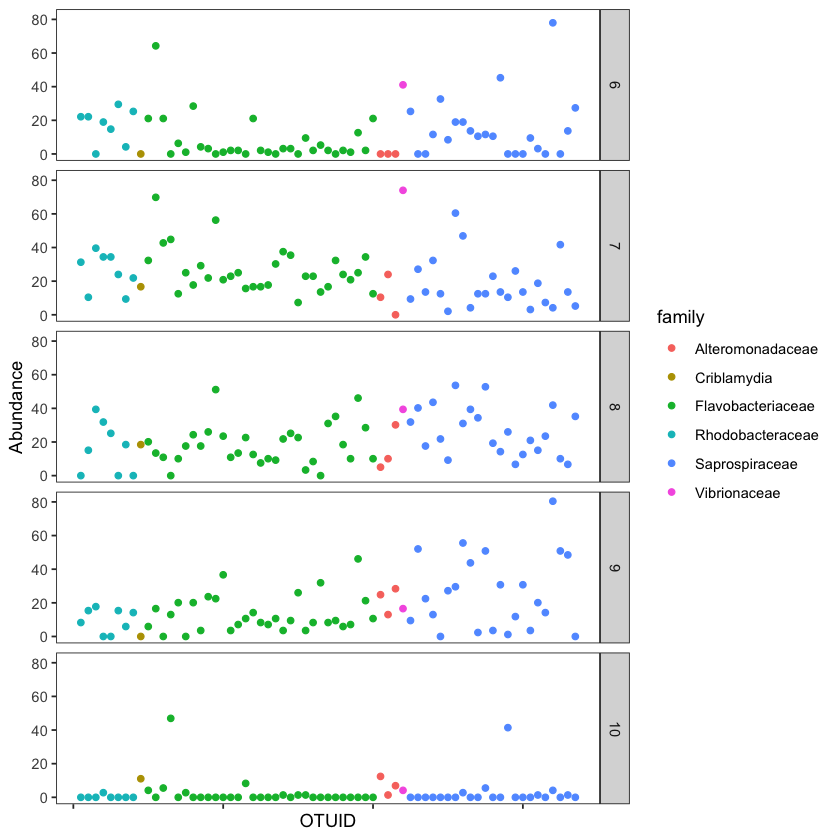

In [113]:
plot=ggplot(data=All, aes(x=OTUID, y=Abundance)) + 
  geom_point(aes(color=family))+ 
  theme_bw()+ facet_grid(Sample2~., scale="free_y")+ 
ylim(0, 82)+
theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.text.x=element_blank())
#geom_hline(data=means, aes(yintercept=Abundance, color=DiseaseState), size=1.25, alpha=0.5)
plot

In [117]:
ggsave("~/Documents/Miami_WBD/rough_plots/All_sig.pdf", device="pdf", h=5, w=6) 

In [16]:
Rhodo=sigtaxcounts[sigtaxcounts$family=="Rhodobacteraceae",]
Rhodo=Rhodo[c(1,15:24)]
Rhodo=melt(Rhodo)
colnames(Rhodo)=c("OTUID", "Sample", "Abundance")
Rhodo$DiseaseState = ifelse(grepl("D", as.vector(Rhodo$Sample))=='TRUE', 'Diseased', 'Healthy')
Rhodo$Sample=gsub('^.', '', Rhodo$Sample)
Rhodo$Sample2=factor(Rhodo$Sample, levels=c("6","7","8","9","10"))
means=aggregate(Abundance~DiseaseState+Sample2, Rhodo, FUN=mean)

Using Row.names as id variables


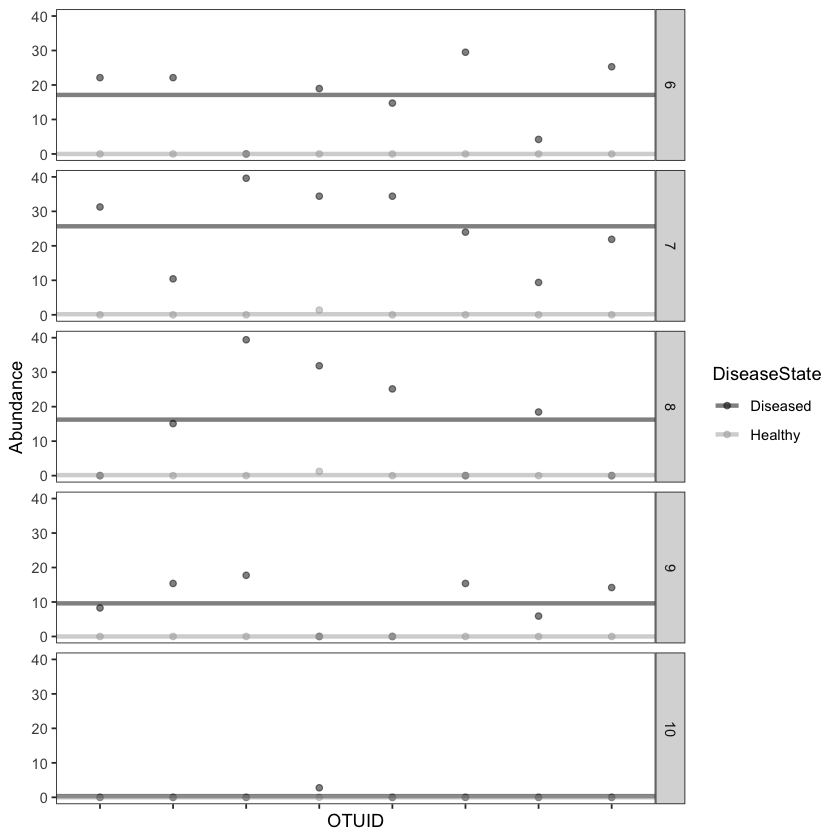

In [225]:
plot=ggplot(data=Rhodo, aes(x=OTUID, y=Abundance)) + 
  geom_point(aes(color=DiseaseState), alpha=0.5)+ scale_color_manual(values=c("black", "darkgray")) +
  theme_bw()+ facet_grid(Sample2~., scale="free_y")+ 
ylim(0, 40)+
theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.text.x=element_blank())+
geom_hline(data=means, aes(yintercept=Abundance, color=DiseaseState), size=1.25, alpha=0.5)
plot

In [227]:
ggsave("~/Documents/Miami_WBD/rough_plots/rhodos2.pdf", device="pdf", h=5, w=3) 

In [229]:
Flavo=sigtaxcounts[sigtaxcounts$family=="Flavobacteriaceae",]
Flavo=Flavo[c(1,15:24)]
Flavo=melt(Flavo)
colnames(Flavo)=c("OTUID", "Sample", "Abundance")
Flavo$DiseaseState = ifelse(grepl("D", as.vector(Flavo$Sample))=='TRUE', 'Diseased', 'Healthy')
Flavo$Sample=gsub('^.', '', Flavo$Sample)
Flavo$Sample2=factor(Flavo$Sample, levels=c("6","7","8","9","10"))
means=aggregate(Abundance~DiseaseState+Sample2, Flavo, FUN=mean)

Using Row.names as id variables


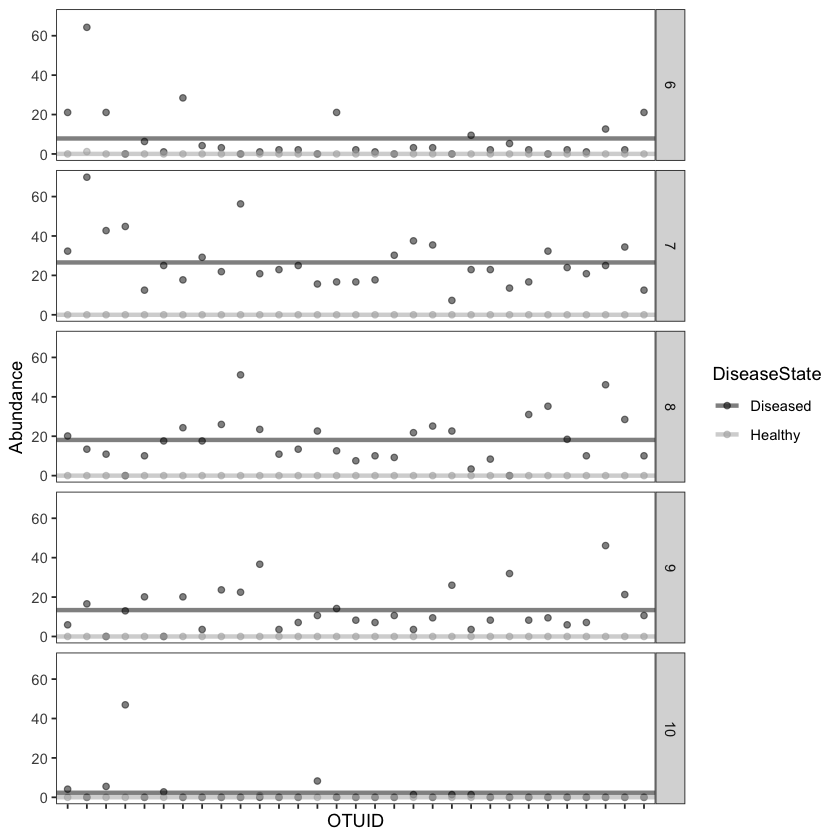

In [230]:
plot=ggplot(data=Flavo, aes(x=OTUID, y=Abundance)) + 
  geom_point(aes(color=DiseaseState), alpha=0.5)+ scale_color_manual(values=c("black", "darkgray")) +
  theme_bw()+ facet_grid(Sample2~., scale="free_y")+ 
ylim(0, 70)+
theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.text.x=element_blank())+
geom_hline(data=means, aes(yintercept=Abundance, color=DiseaseState), size=1.25, alpha=0.5)
#stat_summary(aes(y = Abundance,group=DiseaseState, color=DiseaseState), fun.y=mean,  geom="line")
plot

In [231]:
ggsave("~/Documents/Miami_WBD/rough_plots/flavos2.pdf", device="pdf", h=5, w=6) 

In [232]:
Sapro=sigtaxcounts[sigtaxcounts$family=="Saprospiraceae",]
Sapro=Sapro[c(1,15:24)]
Sapro=melt(Sapro)
colnames(Sapro)=c("OTUID", "Sample", "Abundance")
Sapro$DiseaseState = ifelse(grepl("D", as.vector(Sapro$Sample))=='TRUE', 'Diseased', 'Healthy')
Sapro$Sample=gsub('^.', '', Sapro$Sample)
Sapro$Sample2=factor(Sapro$Sample, levels=c("6","7","8","9","10"))
means=aggregate(Abundance~DiseaseState+Sample2, Sapro, FUN=mean)

Using Row.names as id variables


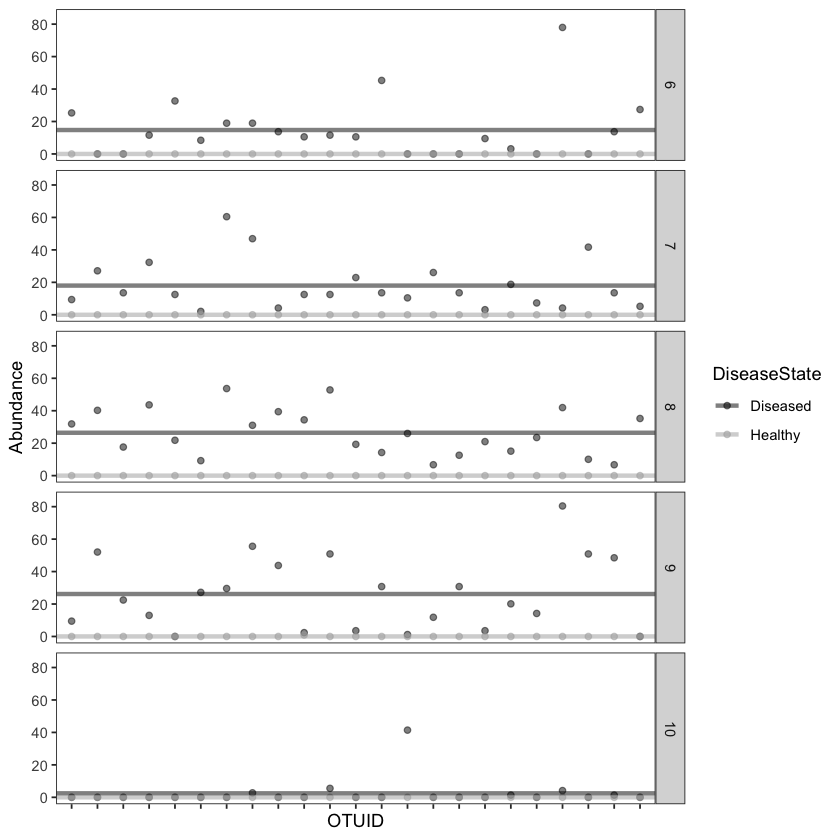

In [233]:
plot=ggplot(data=Sapro, aes(x=OTUID, y=Abundance)) + 
  geom_point(aes(color=DiseaseState), alpha=0.5)+ scale_color_manual(values=c("black", "darkgray")) +
  theme_bw()+ facet_grid(Sample2~., scale="free_y")+ 
ylim(0, 85)+
theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.text.x=element_blank())+
geom_hline(data=means, aes(yintercept=Abundance, color=DiseaseState), size=1.25, alpha=0.5)
#stat_summary(aes(y = Abundance,group=DiseaseState, color=DiseaseState), fun.y=mean,  geom="line")
plot

In [234]:
ggsave("~/Documents/Miami_WBD/rough_plots/sapros2.pdf", device="pdf", h=5, w=6) 

In [253]:
Vibrio=sigtaxcounts[sigtaxcounts$family=="Vibrionaceae","Saprospiraceae",]
Vibrio=Vibrio[c(1,15:24)]
Vibrio=melt(Vibrio)
colnames(Vibrio)=c("OTUID", "Sample", "Abundance")
Vibrio$DiseaseState = ifelse(grepl("D", as.vector(Vibrio$Sample))=='TRUE', 'Diseased', 'Healthy')
Vibrio$Sample=gsub('^.', '', Vibrio$Sample)
Vibrio$Sample2=factor(Vibrio$Sample, levels=c("6","7","8","9","10"))
means=aggregate(Abundance~DiseaseState+Sample2, Vibrio, FUN=mean)

Using Row.names as id variables


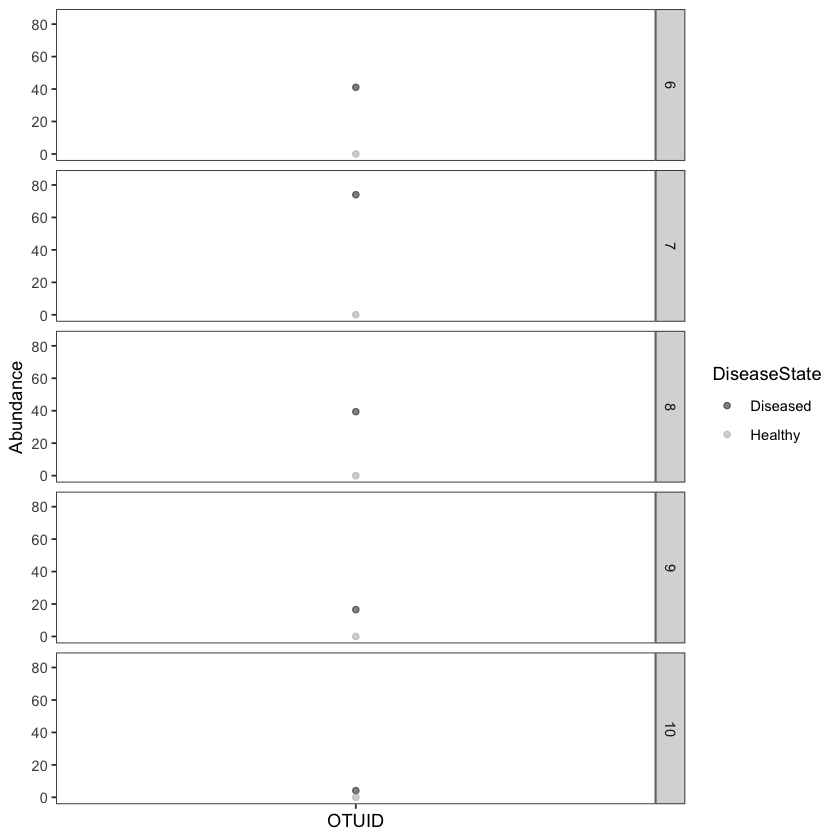

In [254]:
plot=ggplot(data=Vibrio, aes(x=OTUID, y=Abundance)) + 
  geom_point(aes(color=DiseaseState), alpha=0.5)+ scale_color_manual(values=c("black", "darkgray")) +
  theme_bw()+ facet_grid(Sample2~., scale="free_y")+ 
ylim(0, 85)+
theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.text.x=element_blank())
#geom_hline(data=means, aes(yintercept=Abundance, color=DiseaseState), size=1.25, alpha=0.5)
#stat_summary(aes(y = Abundance,group=DiseaseState, color=DiseaseState), fun.y=mean,  geom="line")
plot

In [255]:
ggsave("~/Documents/Miami_WBD/rough_plots/vibrios2.pdf", device="pdf", h=5, w=2.4) 

In [242]:
Altero=sigtaxcounts[sigtaxcounts$family=="Alteromonadaceae","Vibrionaceae","Saprospiraceae",]
Altero=Altero[c(1,15:24)]
Altero=melt(Altero)
colnames(Altero)=c("OTUID", "Sample", "Abundance")
Altero$DiseaseState = ifelse(grepl("D", as.vector(Altero$Sample))=='TRUE', 'Diseased', 'Healthy')
Altero$Sample=gsub('^.', '', Altero$Sample)
Altero$Sample2=factor(Altero$Sample, levels=c("6","7","8","9","10"))
means=aggregate(Abundance~DiseaseState+Sample2, Altero, FUN=mean)

Using Row.names as id variables


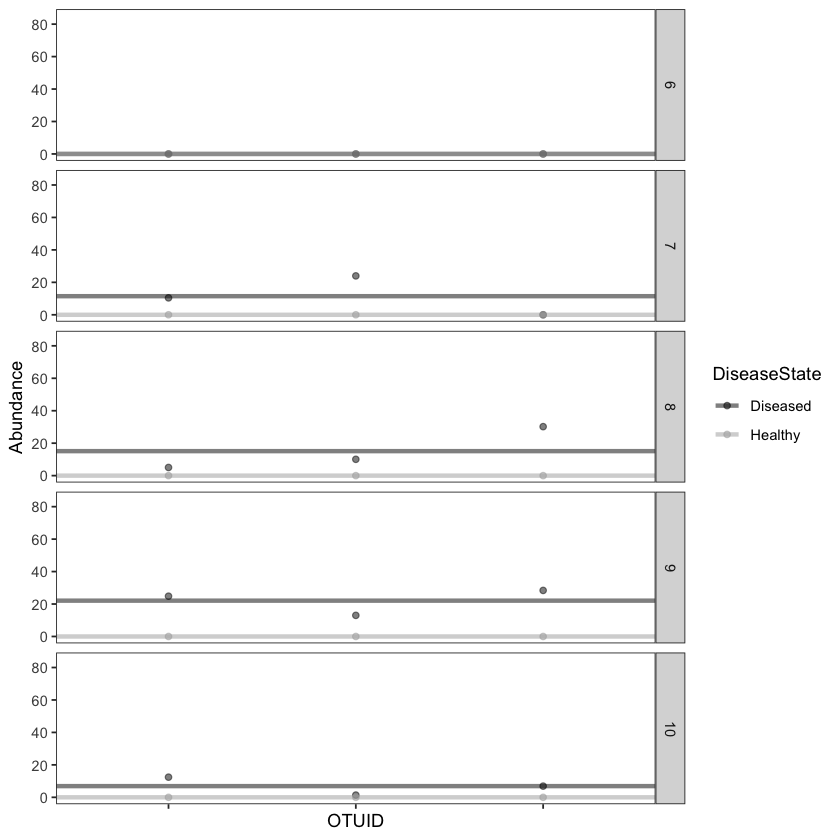

In [243]:
plot=ggplot(data=Altero, aes(x=OTUID, y=Abundance)) + 
  geom_point(aes(color=DiseaseState), alpha=0.5)+ scale_color_manual(values=c("black", "darkgray")) +
  theme_bw()+ facet_grid(Sample2~., scale="free_y")+ 
ylim(0, 85)+
theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.text.x=element_blank())+
geom_hline(data=means, aes(yintercept=Abundance, color=DiseaseState), size=1.25, alpha=0.5)
#stat_summary(aes(y = Abundance,group=DiseaseState, color=DiseaseState), fun.y=mean,  geom="line")
plot

In [244]:
ggsave("~/Documents/Miami_WBD/rough_plots/alteros2.pdf", device="pdf", h=5, w=2.8) 

In [249]:
Chlyamidia=sigtaxcounts[sigtaxcounts$family=="Criblamydia","Alteromonadaceae","Vibrionaceae","Saprospiraceae",]
Chlyamidia=Chlyamidia[c(1,15:24)]
Chlyamidia=melt(Chlyamidia)
colnames(Chlyamidia)=c("OTUID", "Sample", "Abundance")
Chlyamidia$DiseaseState = ifelse(grepl("D", as.vector(Chlyamidia$Sample))=='TRUE', 'Diseased', 'Healthy')
Chlyamidia$Sample=gsub('^.', '', Chlyamidia$Sample)
Chlyamidia$Sample2=factor(Chlyamidia$Sample, levels=c("6","7","8","9","10"))
means=aggregate(Abundance~DiseaseState+Sample2, Chlyamidia, FUN=mean)

Using Row.names as id variables


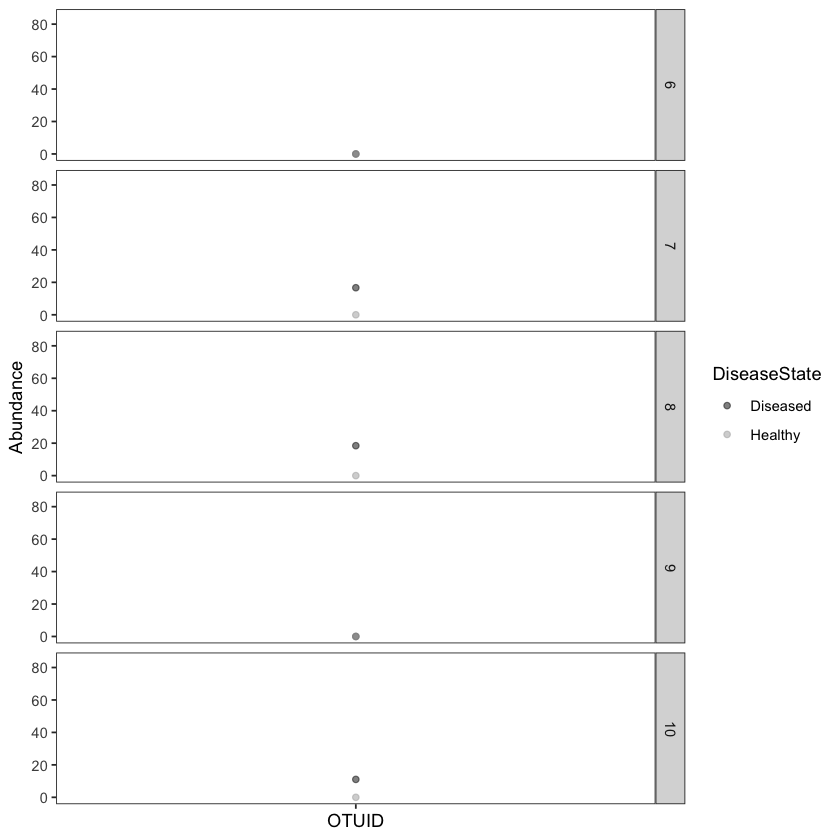

In [251]:
plot=ggplot(data=Chlyamidia, aes(x=OTUID, y=Abundance)) + 
  geom_point(aes(color=DiseaseState), alpha=0.5)+ scale_color_manual(values=c("black", "darkgray")) +
  theme_bw()+ facet_grid(Sample2~., scale="free_y")+ 
ylim(0, 85)+
theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.text.x=element_blank())
#geom_hline(data=means, aes(yintercept=Abundance, color=DiseaseState), size=1.25, alpha=0.5)
#stat_summary(aes(y = Abundance,group=DiseaseState, color=DiseaseState), fun.y=mean,  geom="line")
plot

In [252]:
ggsave("~/Documents/Miami_WBD/rough_plots/chlam.pdf", device="pdf", h=5, w=2.5) 